In [1]:
# read nc output from WAOM 10km run

import xarray as xr
import pandas as p
import numpy as np
import numpy.ma as ma
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.ticker import NullFormatter
from matplotlib.colors import LinearSegmentedColormap   # for custom colormaps

from datetime import datetime, timedelta

from netCDF4 import Dataset
from netCDF4 import num2date, date2num
from matplotlib.ticker import NullFormatter
from matplotlib.colors import LinearSegmentedColormap   # for custom colormaps

#import iris
#import iris.iterate
#import iris.coords
#import iris.plot as iplt
import gsw

In [3]:
# load ROMS avg output
for mm  in ['01','02','03','04','05','06','07','08','09','10','11','12']:
    ds = xr.open_dataset('/scratch/project_2000789/boeiradi/waom10extend_shflim_S_0.25Q/output_20yr_diag/ocean_avg_00' + mm + '.nc')
    print(ds.variables["temp"].shape)
    temp_tmp = np.nanmean(ds.variables["temp"], axis=0)
    salt_tmp = np.nanmean(ds.variables["salt"], axis=0)
    shflux_tmp = np.nanmean(ds.variables["shflux"], axis=0)
    ssflux_tmp = np.nanmean(ds.variables["ssflux"], axis=0)
    m_tmp = np.nanmean(ds.variables["m"], axis=0)
    
    ds = ds.set_coords(['Cs_r', 'Cs_w', 'hc', 'h', 'Vtransform'])
    if ds.Vtransform == 1:
        Zo_rho = ds.hc * (ds.s_rho - ds.Cs_r) + ds.Cs_r * ds.h
        z_rho_tmp = Zo_rho + ds.zeta * (1 + Zo_rho/ds.h)
        print("Vtransform=1")
    elif ds.Vtransform == 2:
        Zo_rho = (ds.hc * ds.s_rho + ds.Cs_r * ds.h) / (ds.hc + ds.h)
        z_rho_tmp = ds.zeta + (ds.zeta + ds.h) * Zo_rho + ds.zice
        print("Vtransform=2")
        Zo_w = (ds.hc * ds.s_w + ds.Cs_w * ds.h) / (ds.hc + ds.h)
        z_w_tmp = ds.zeta + (ds.zeta + ds.h) * Zo_w + ds.zice
        
    z_rho_avg = np.nanmean(z_rho_tmp, axis=0)
    z_w_avg = np.nanmean(z_w_tmp,axis=0)
    
    # concatanate monthly avgs into a yearly variable
    if mm == '01':
        temp = temp_tmp
        salt = salt_tmp
        shflux = shflux_tmp
        ssflux = ssflux_tmp
        m = m_tmp
        z_rho = z_rho_avg
        z_w = z_w_avg
    elif mm == '02':
        temp = np.stack((temp,temp_tmp), axis=0)
        salt = np.stack((salt,salt_tmp), axis=0)
        shflux = np.stack((shflux,shflux_tmp), axis=0)
        ssflux = np.stack((ssflux,ssflux_tmp), axis=0)
        m = np.stack((m,m_tmp), axis=0)
        z_rho = np.stack((z_rho,z_rho_avg), axis=0)
        z_w = np.stack((z_w,z_w_avg), axis=0)
    else:
        temp_tmp_4thdim = np.expand_dims(temp_tmp, axis=0)
        temp = np.concatenate((temp,temp_tmp_4thdim), axis=0)
        salt_tmp_4thdim = np.expand_dims(salt_tmp, axis=0)
        salt = np.concatenate((salt,salt_tmp_4thdim), axis=0)
        shflux_tmp_4thdim = np.expand_dims(shflux_tmp, axis=0)
        shflux = np.concatenate((shflux,shflux_tmp_4thdim), axis=0)    
        ssflux_tmp_4thdim = np.expand_dims(ssflux_tmp, axis=0)
        ssflux = np.concatenate((ssflux,ssflux_tmp_4thdim), axis=0) 
        m_tmp_4thdim = np.expand_dims(m_tmp, axis=0)
        m = np.concatenate((m,m_tmp_4thdim), axis=0) 
        z_rho_tmp_4thdim = np.expand_dims(z_rho_avg, axis=0)
        z_rho = np.concatenate((z_rho,z_rho_tmp_4thdim), axis=0) 
        z_w_tmp_4thdim = np.expand_dims(z_w_avg, axis=0)
        z_w = np.concatenate((z_w,z_w_tmp_4thdim), axis=0) 
#ds.coords['flux'] = flux#.transpose() # put flux into ds dataset

    ds.close()
    
sigma_t_sfc = gsw.rho(salt[:,-1,:,:],temp[:,-1,:,:],0) - 1000

(7, 31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


Vtransform=2


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice


(6, 31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


Vtransform=2


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice


(6, 31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


Vtransform=2


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice


(6, 31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


Vtransform=2


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice


(6, 31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


Vtransform=2


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice


(6, 31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


Vtransform=2


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice


(6, 31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


Vtransform=2


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice


(6, 31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


Vtransform=2


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice


(6, 31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


Vtransform=2


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice


(6, 31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


Vtransform=2


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice


(6, 31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


Vtransform=2


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice


(6, 31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


Vtransform=2


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice


In [4]:
di = xr.open_dataset('/scratch/project_2000789/boeiradi/waom10extend_shflim_S_0.25Q/output_20yr_diag/ocean_avg_0001.nc')
ice_draft = di.variables["zice"]

mask_zice = ma.masked_where(ice_draft < 0, np.ones(ice_draft.shape))

di.close()


In [5]:
# calculate dz following:
dz = np.empty((12,560,630,31))
dz_inv = np.empty((12,560,630,31))


for tt in np.arange(0,12):
    z_w_sorted = -1*z_w[tt,:,:,::-1]
    print(z_w_sorted.shape)
    dz_inv[tt,:,:,:] = np.diff(z_w_sorted,axis=2)
    dz[tt,:,:,:] = dz_inv[tt,:,:,::-1]

(560, 630, 32)
(560, 630, 32)
(560, 630, 32)
(560, 630, 32)
(560, 630, 32)
(560, 630, 32)
(560, 630, 32)
(560, 630, 32)
(560, 630, 32)
(560, 630, 32)
(560, 630, 32)
(560, 630, 32)


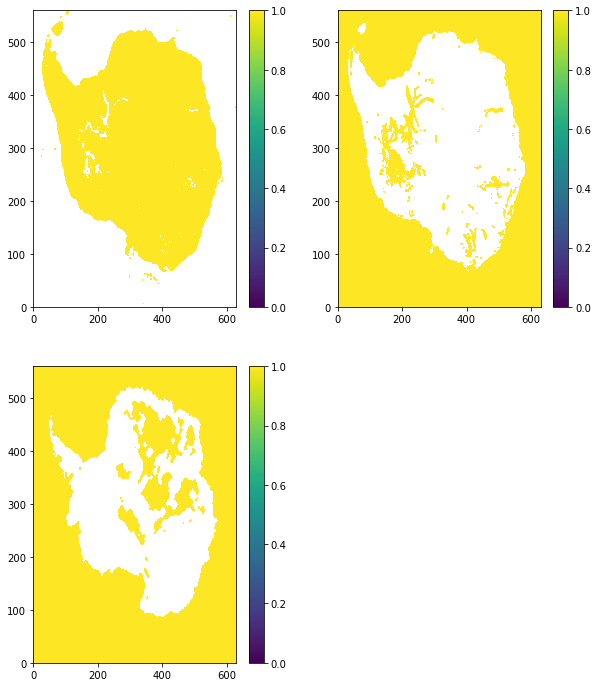

In [6]:
dg = xr.open_dataset("/scratch/project_2000789/boeiradi/waom10_frc/waom10extend_grd.nc")

lat_rho = dg.variables["lat_rho"]
lon_rho = dg.variables["lon_rho"]
pm = dg.variables["pm"]
pn = dg.variables["pn"]

ds.coords['lat_rho']=lat_rho.transpose() # put lat_rho into ds dataset
ds.coords['lon_rho']=lon_rho.transpose() # put lon_rho into ds dataset

# shelf/open-ocean masks:
mask_open = ma.masked_where(dg.h <= 1000, np.ones(dg.h.shape))
mask_shelf = ma.masked_where(dg.h > 1000, np.ones(dg.h.shape))


#mask_shelf = np.empty((dg.h.shape))
#mask_open = np.empty((dg.h.shape))

#open_ind=ds.h.where(dg.h > 1000)
#shelf_ind=ds.h.where(dg.h <= 1000)
#print(open_ind)

#mask_shelf = np.divide(shelf_ind,shelf_ind)
#mask_open = np.divide(open_ind,open_ind)

fig = plt.figure(figsize=(10,12))
ax1 = fig.add_subplot(221)#, projection=proj)
cy=plt.pcolor(mask_shelf)#, transform=ccrs.PlateCarree())
plt.colorbar(cy)
plt.clim(0.,1.)
ax2 = fig.add_subplot(222)#, projection=proj)
cy=plt.pcolor(mask_open)#, transform=ccrs.PlateCarree())
plt.colorbar(cy)
plt.clim(0.,1.)
ax3 = fig.add_subplot(223)#, projection=proj)
cy=plt.pcolor(mask_zice)#, transform=ccrs.PlateCarree())
plt.colorbar(cy)
plt.clim(0.,1.)

In [7]:
dx = xr.open_dataset('/scratch/project_2000339/boeiradi/waom10extend_shflim_S_0.25Q/output_20yr_diag/MLD_vint_vars_for_WMT.nc')
print(dx.variables["sfc_mld"].shape)
sfc_mld = dx.variables["sfc_mld"]
# - variables across ML base
temp_avg_mld = dx.variables["temp_avg_mld"]
salt_avg_mld = dx.variables["salt_avg_mld"]

# - variables integrated throughout the ML; multiply by -1 b/c dz is negative.
temp_vdia_diff_mld_vint = dx.variables["temp_vdia_diff_mld_vint"]
salt_vdia_diff_mld_vint = dx.variables["salt_vdia_diff_mld_vint"]
temp_hdia_diff_mld_vint = dx.variables["temp_hdia_diff_mld_vint"]
salt_hdia_diff_mld_vint = dx.variables["salt_hdia_diff_mld_vint"]
temp_vdia_adv_mld_vint = dx.variables["temp_vdia_adv_mld_vint"]
salt_vdia_adv_mld_vint = dx.variables["salt_vdia_adv_mld_vint"]
temp_hdia_adv_mld_vint = dx.variables["temp_hdia_adv_mld_vint"]
salt_hdia_adv_mld_vint = dx.variables["salt_hdia_adv_mld_vint"]
temp_tend_mld_vint = dx.variables["temp_tend_avg_mld_vint"]
salt_tend_mld_vint = dx.variables["salt_tend_avg_mld_vint"]

sigma_t = gsw.rho(salt_avg_mld,temp_avg_mld,0) - 1000

dx.close()

(12, 560, 630)


In [8]:
# obtain thermal expansion (alpha) & salinity contraction (beta) coefficients:
SA_avg_mld = np.empty(salt_avg_mld.shape)
# neet Absolute Salinity, converting from Pratical Salinity:
for mm in np.arange(0,12):
    SA_tmp =gsw.SA_from_SP(np.squeeze(salt_avg_mld[mm,:,:]),0,lon_rho,lat_rho)
    SA_avg_mld[mm,:,:] = SA_tmp
    del SA_tmp

# gsw.alpha/gsw.beta
#alpha = gsw_alpha(SA,CT,p)
[specvol_mld, alpha_mld, beta_mld] = gsw.specvol_alpha_beta(SA_avg_mld,temp_avg_mld,0)

print(alpha_mld.shape)


(12, 560, 630)


In [9]:
# calculate the LHS term in Pellichero et al (2018):
# ps: Diffusion (R_s, R_t) terms already include the sfc fluxes

# heat (eqn 5)
rho0 = 1025 #1000
Cp = 3985

# convert salt convergenvces to equivalent FW
# fwf_sfc = (np.divide(beta_mld*ssflux*rho0*dz[:,:,:,-1], -salt[:,-1,:,:]))*specvol_mld

# fwf_hdia_adv_mld_vint = np.divide(salt_hdia_adv_mld_vint*rho0, -salt_avg_mld[:,:,:])*specvol_mld
# fwf_vdia_adv_mld_vint = np.divide(salt_vdia_adv_mld_vint*rho0, -salt_avg_mld[:,:,:])*specvol_mld
# fwf_hdia_diff_mld_vint = np.divide(salt_hdia_diff_mld_vint*rho0, -salt_avg_mld[:,:,:])*specvol_mld
# fwf_vdia_diff_mld_vint = np.divide(salt_vdia_diff_mld_vint*rho0, -salt_avg_mld[:,:,:])*specvol_mld

# total diffusion terms:
R_s_vint = beta_mld*(salt_hdia_diff_mld_vint + salt_vdia_diff_mld_vint)
R_t_vint = alpha_mld*(temp_hdia_diff_mld_vint + temp_vdia_diff_mld_vint)
# R_f_vint = fwf_hdia_diff_mld_vint + fwf_vdia_diff_mld_vint

# surface flux terms:
salt_sfc = beta_mld*(ssflux)
temp_sfc = alpha_mld*(np.divide(shflux, rho0*Cp))

# advection terms:
salt_adv_mld_vint = beta_mld*(salt_hdia_adv_mld_vint + salt_vdia_adv_mld_vint)
temp_adv_mld_vint = alpha_mld*(temp_hdia_adv_mld_vint + temp_vdia_adv_mld_vint)
# fwf_adv_mld_vint = fwf_hdia_adv_mld_vint + fwf_vdia_adv_mld_vint

# net tendencies
salt_net_mld_vint = beta_mld*salt_tend_mld_vint
temp_net_mld_vint = alpha_mld*temp_tend_mld_vint
# fwf_net_mld_vint = (np.divide(salt_tend_mld_vint*rho0, -salt_avg_mld[:,:,:]))*specvol_mld

# ML budget equation: 
# salt:
# salt_sfc - R_s = -salt_tend_mld + salt_hdia_adv_mld + salt_vdia_adv_mld

# temp:
# temp_sfc - R_t = -temp_tend_mld + temp_hdia_adv_mld + temp_vdia_adv_mld

In [10]:
#  Function to calculate Water Mass Transformation (in m3/s):

# rho grid for binning:
#rho_grid=np.arange(35.5,37.4,0.1) # for sigma-2
rho_grid=np.arange(24.4,29.1,0.1) # for sigma-0
len_rho_grid=len(rho_grid)

dx = np.divide(1,pm)
dy = np.divide(1,pn)
# dt = 86400#30#/12 #why divide by 12?

def wmt(var_int, dx, dy,var_type):
    # var_type: 'budget' or 'sfc_frc'
    
    F_rate_var_vint = np.empty(var_int.shape)
    
    for mm in np.arange(0,12):
        if var_type == 'budget':
            F_rate_var_vint[mm,:] = dx*dy*var_int.isel(times=mm)
        elif var_type == 'sfc_frc':
            F_rate_var_vint[mm,:] = dx*dy*var_int[mm,:,:]

    print(F_rate_var_vint.shape)

    F_rate_delta_var_vint_mm = np.empty((12,len_rho_grid,560,630))

    for mm in np.arange(0,12):
        sigma_tmp = sigma_t[mm,:,:]
    
        #print(mm)
        for irho in np.arange(0,len_rho_grid):
    
            #print(irho)
            F_rate_tmp = ma.masked_where(np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2))), F_rate_var_vint[mm,:,:])

            if irho == 0:
                F_rate_delta = F_rate_tmp.copy()
                F_rate_delta[np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2)))] = np.nan
            elif irho == 1:
                F_rate_tmp[np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2)))] = np.nan
                F_rate_delta = np.stack((F_rate_delta,F_rate_tmp), axis=0)
            else:
                F_rate_tmp[np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2)))] = np.nan
                F_rate_extradim = np.expand_dims(F_rate_tmp, axis=0)
                F_rate_delta = np.concatenate((F_rate_delta,F_rate_extradim), axis=0)
            del F_rate_tmp
        
        F_rate_delta_var_vint_mm[mm,:] = F_rate_delta
    
    print('completed, size: ', F_rate_delta_var_vint_mm.shape)
    
    return F_rate_delta_var_vint_mm

# -- Units --
# Heat: m.degC/s -> m3.degC/s
# Salt: m/s -> m3/s
# Fwf: Kg.m-2.s-1 = Kg/s

In [12]:
# Shelf only: excluding open ocean & ice shelves

Fs_rate_delta_adv_vint_shelf_mm = wmt(salt_adv_mld_vint*mask_shelf*mask_zice, dx, dy,'budget')
Fs_rate_delta_diff_vint_shelf_mm = wmt(R_s_vint*mask_shelf*mask_zice, dx, dy,'budget')
Fs_rate_delta_net_vint_shelf_mm = wmt(salt_net_mld_vint*mask_shelf*mask_zice, dx, dy,'budget')
Fs_rate_delta_sfc_shelf_mm = wmt(salt_sfc*mask_shelf*mask_zice, dx, dy,'sfc_frc')
    
# Ff_rate_delta_adv_vint_shelf_mm = wmt(fwf_adv_mld_vint*mask_shelf*mask_zice, dx, dy,'budget')
# Ff_rate_delta_diff_vint_shelf_mm = wmt(R_f_vint*mask_shelf*mask_zice, dx, dy,'budget')
# Ff_rate_delta_net_vint_shelf_mm = wmt(fwf_net_mld_vint*mask_shelf*mask_zice, dx, dy,'budget')
# Ff_rate_delta_sfc_shelf_mm = wmt(fwf_sfc*mask_shelf*mask_zice, dx, dy,'sfc_frc')

Fh_rate_delta_adv_vint_shelf_mm = wmt(temp_adv_mld_vint*mask_shelf*mask_zice, dx, dy,'budget')
Fh_rate_delta_diff_vint_shelf_mm = wmt(R_t_vint*mask_shelf*mask_zice, dx, dy,'budget')
Fh_rate_delta_net_vint_shelf_mm = wmt(temp_net_mld_vint*mask_shelf*mask_zice, dx, dy,'budget')
Fh_rate_delta_sfc_shelf_mm = wmt(temp_sfc*mask_shelf*mask_zice, dx, dy,'sfc_frc')



(12, 560, 630)
completed, size:  (12, 48, 560, 630)
(12, 560, 630)
completed, size:  (12, 48, 560, 630)
(12, 560, 630)
completed, size:  (12, 48, 560, 630)
(12, 560, 630)
completed, size:  (12, 48, 560, 630)
(12, 560, 630)
completed, size:  (12, 48, 560, 630)
(12, 560, 630)
completed, size:  (12, 48, 560, 630)
(12, 560, 630)
completed, size:  (12, 48, 560, 630)
(12, 560, 630)
completed, size:  (12, 48, 560, 630)


In [13]:
# development mask for density classes:
sigma_sept = sigma_t[8,0:50,0:50]

for irho in np.arange(0,len_rho_grid):
    print(irho, rho_grid[irho]-(0.1/2), rho_grid[irho]+(0.1/2), sigma_sept.shape)    
    icritst_tmp = ma.masked_where(np.logical_or(sigma_sept <= (rho_grid[irho]-(0.1/2)),sigma_sept > (rho_grid[irho]+(0.1/2))), sigma_sept)    
    
    if irho == 0:
        icritst = icritst_tmp.copy()
        icritst[np.logical_or(sigma_sept <= (rho_grid[irho]-(0.1/2)),sigma_sept > (rho_grid[irho]+(0.1/2)))] = np.nan
    elif irho == 1:
        icritst_tmp[np.logical_or(sigma_sept <= (rho_grid[irho]-(0.1/2)),sigma_sept > (rho_grid[irho]+(0.1/2)))] = np.nan
        icritst = np.stack((icritst,icritst_tmp), axis=0)
    else:
        icritst_tmp[np.logical_or(sigma_sept <= (rho_grid[irho]-(0.1/2)),sigma_sept > (rho_grid[irho]+(0.1/2)))] = np.nan
        icritst_extradim = np.expand_dims(icritst_tmp, axis=0)
        icritst = np.concatenate((icritst,icritst_extradim), axis=0)
    del icritst_tmp
    
print(icritst.shape)

0 24.349999999999998 24.45 (50, 50)
1 24.45 24.55 (50, 50)
2 24.55 24.650000000000002 (50, 50)
3 24.650000000000002 24.750000000000004 (50, 50)
4 24.750000000000004 24.850000000000005 (50, 50)
5 24.850000000000005 24.950000000000006 (50, 50)
6 24.950000000000006 25.050000000000008 (50, 50)
7 25.050000000000008 25.15000000000001 (50, 50)
8 25.15000000000001 25.25000000000001 (50, 50)
9 25.25000000000001 25.350000000000012 (50, 50)
10 25.350000000000012 25.450000000000014 (50, 50)
11 25.450000000000014 25.550000000000015 (50, 50)
12 25.550000000000015 25.650000000000016 (50, 50)
13 25.650000000000016 25.750000000000018 (50, 50)
14 25.750000000000018 25.85000000000002 (50, 50)
15 25.85000000000002 25.95000000000002 (50, 50)
16 25.95000000000002 26.050000000000022 (50, 50)
17 26.050000000000022 26.150000000000023 (50, 50)
18 26.150000000000023 26.250000000000025 (50, 50)
19 26.250000000000025 26.350000000000026 (50, 50)
20 26.350000000000026 26.450000000000028 (50, 50)
21 26.45000000000002

In [14]:
# integrated over x, y directions: only continental shelf

Fs_rate_sfc_shelf_mm_int = np.empty((len(rho_grid),12))
# Ff_rate_sfc_shelf_mm_int = np.empty((len(rho_grid),12))
Fh_rate_sfc_shelf_mm_int = np.empty((len(rho_grid),12))

Fs_rate_adv_vint_shelf_mm_int = np.empty((len(rho_grid),12))
# Ff_rate_adv_vint_shelf_mm_int = np.empty((len(rho_grid),12))
Fh_rate_adv_vint_shelf_mm_int = np.empty((len(rho_grid),12))
Fs_rate_diff_vint_shelf_mm_int = np.empty((len(rho_grid),12))
# Ff_rate_diff_vint_shelf_mm_int = np.empty((len(rho_grid),12))
Fh_rate_diff_vint_shelf_mm_int = np.empty((len(rho_grid),12))
Fs_rate_net_vint_shelf_mm_int = np.empty((len(rho_grid),12))
# Ff_rate_net_vint_shelf_mm_int = np.empty((len(rho_grid),12))
Fh_rate_net_vint_shelf_mm_int = np.empty((len(rho_grid),12))


for irho in np.arange(0,len(rho_grid)):   
    for mm in np.arange(0,12):
        
        Fs_rate_sfc_shelf_mm_int[irho,mm] = np.nansum(np.nansum(Fs_rate_delta_sfc_shelf_mm[mm,irho,:], axis=1), axis=0)
#         Ff_rate_sfc_shelf_mm_int[irho,mm] = np.nansum(np.nansum(Ff_rate_delta_sfc_shelf_mm[mm,irho,:], axis=1), axis=0)
        Fh_rate_sfc_shelf_mm_int[irho,mm] = np.nansum(np.nansum(Fh_rate_delta_sfc_shelf_mm[mm,irho,:], axis=1), axis=0)
        
        Fs_rate_adv_vint_shelf_mm_int[irho,mm] = np.nansum(np.nansum(Fs_rate_delta_adv_vint_shelf_mm[mm,irho,:], axis=1), axis=0)
#         Ff_rate_adv_vint_shelf_mm_int[irho,mm] = np.nansum(np.nansum(Ff_rate_delta_adv_vint_shelf_mm[mm,irho,:], axis=1), axis=0)
        Fh_rate_adv_vint_shelf_mm_int[irho,mm] = np.nansum(np.nansum(Fh_rate_delta_adv_vint_shelf_mm[mm,irho,:], axis=1), axis=0)
        
        Fs_rate_diff_vint_shelf_mm_int[irho,mm] = np.nansum(np.nansum(Fs_rate_delta_diff_vint_shelf_mm[mm,irho,:], axis=1), axis=0)
#         Ff_rate_diff_vint_shelf_mm_int[irho,mm] = np.nansum(np.nansum(Ff_rate_delta_diff_vint_shelf_mm[mm,irho,:], axis=1), axis=0)
        Fh_rate_diff_vint_shelf_mm_int[irho,mm] = np.nansum(np.nansum(Fh_rate_delta_diff_vint_shelf_mm[mm,irho,:], axis=1), axis=0)
        
        Fs_rate_net_vint_shelf_mm_int[irho,mm] = np.nansum(np.nansum(Fs_rate_delta_net_vint_shelf_mm[mm,irho,:], axis=1), axis=0)
#         Ff_rate_net_vint_shelf_mm_int[irho,mm] = np.nansum(np.nansum(Ff_rate_delta_net_vint_shelf_mm[mm,irho,:], axis=1), axis=0)
        Fh_rate_net_vint_shelf_mm_int[irho,mm] = np.nansum(np.nansum(Fh_rate_delta_net_vint_shelf_mm[mm,irho,:], axis=1), axis=0)




In [22]:
print(Fs_rate_delta_sfc_shelf_mm[mm,irho,:].shape)

(560, 630)


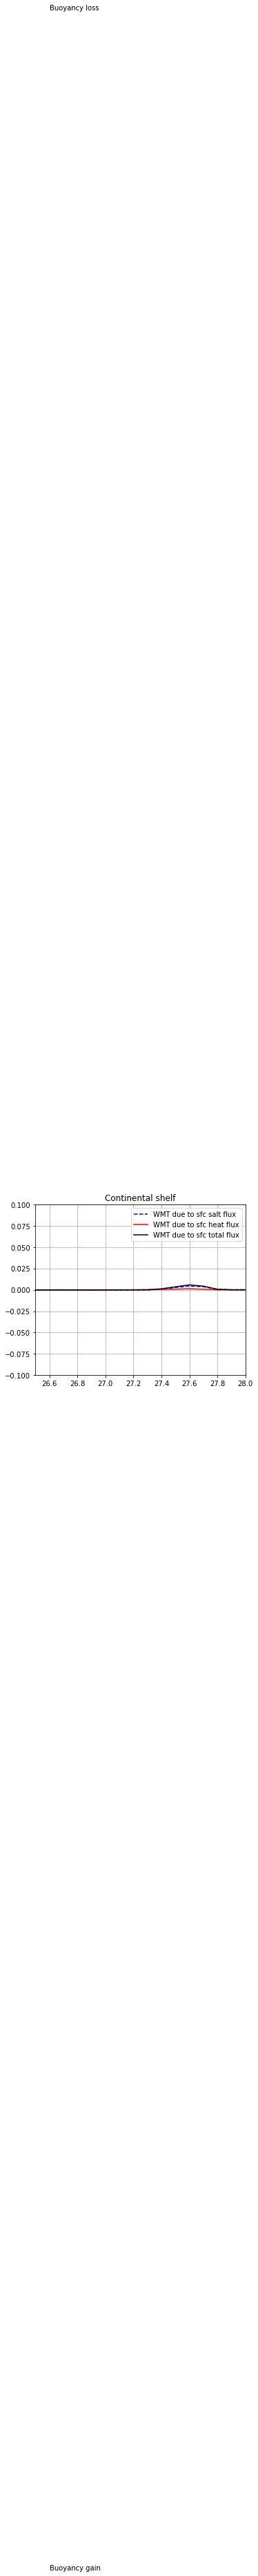

In [38]:
# figures
fig_path = '/users/boeiradi/COLD_project/postprocessing/figs/WMT/'

# plot with bars
width=.023

# convert to rate per year:
Dt = 1/0.1

# divide for Dt (sec in 1 year) and 10^6 to obtain rate in Sv year-1 

# SFC: continental shelf
Fs_sig_sfc_shelf_mm = -Fs_rate_sfc_shelf_mm_int*Dt
Fh_sig_sfc_shelf_mm = -Fh_rate_sfc_shelf_mm_int*Dt
F_sig_sfc_shelf_mm = -Fs_sig_sfc_shelf_mm + Fh_sig_sfc_shelf_mm
# - calculate the anual average of the monthly ars:
Fs_sig_sfc_shelf =  np.nanmean(Fs_sig_sfc_shelf_mm, axis=1)
Fh_sig_sfc_shelf =  np.nanmean(Fh_sig_sfc_shelf_mm, axis=1)
F_sig_sfc_shelf = -Fs_sig_sfc_shelf + Fh_sig_sfc_shelf

# plots:

fig = plt.figure(figsize=(12,10))

ax3 = fig.add_subplot(221)
plt.title('Continental shelf')
cf=plt.plot(rho_grid,-Fs_sig_sfc_shelf*1e-6,'--b',label='WMT due to sfc salt flux')
ch=plt.plot(rho_grid,Fh_sig_sfc_shelf*1e-6,'r',label='WMT due to sfc heat flux')
ct=plt.plot(rho_grid,F_sig_sfc_shelf*1e-6,'k',label='WMT due to sfc total flux')
plt.legend()
plt.xlim(26.5,28),plt.ylim(-.10,.10)
plt.grid(True)
plt.text(26.6,1.5,'Buoyancy loss')
plt.text(26.6,-1.5,'Buoyancy gain')
plt.grid(True)

name_fig="waom10extend_shflim_S_0.25Q_WMT_sfc_fluxes_annual_shelf_noice_comparison.png"
plt.savefig(fig_path + name_fig, dpi=300)



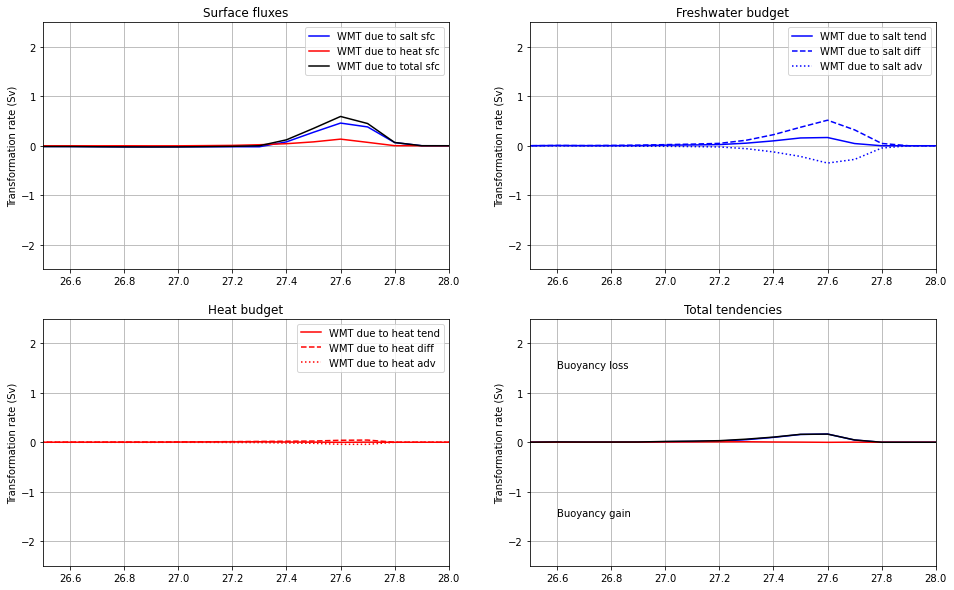

In [14]:
# ADV (vint)
Fs_sig_adv_vint_shelf_mm = -Fs_rate_adv_vint_shelf_mm_int*Dt/1e6 
Fh_sig_adv_vint_shelf_mm = -Fh_rate_adv_vint_shelf_mm_int*Dt/1e6 
F_sig_adv_vint_shelf_mm = -Fs_sig_adv_vint_shelf_mm + Fh_sig_adv_vint_shelf_mm
# - calculate the anual average of the monthly ars:
Fs_sig_adv_vint_shelf =  np.nanmean(Fs_sig_adv_vint_shelf_mm, axis=1)
Fh_sig_adv_vint_shelf =  np.nanmean(Fh_sig_adv_vint_shelf_mm, axis=1)
F_sig_adv_vint_shelf = Fs_sig_adv_vint_shelf + Fh_sig_adv_vint_shelf

# DIFF
Fs_sig_diff_vint_shelf_mm = -Fs_rate_diff_vint_shelf_mm_int*Dt/1e6 
Fh_sig_diff_vint_shelf_mm = -Fh_rate_diff_vint_shelf_mm_int*Dt/1e6 
F_sig_diff_vint_shelf_mm = -Fs_sig_diff_vint_shelf_mm + Fh_sig_diff_vint_shelf_mm
# - calculate the anual average of the monthly ars:
Fs_sig_diff_vint_shelf =  np.nanmean(Fs_sig_diff_vint_shelf_mm, axis=1)
Fh_sig_diff_vint_shelf =  np.nanmean(Fh_sig_diff_vint_shelf_mm, axis=1)
F_sig_diff_vin_shelft = -Fs_sig_diff_vint_shelf + Fh_sig_diff_vint_shelf

# NET
Fs_sig_net_vint_shelf_mm = -Fs_rate_net_vint_shelf_mm_int*Dt/1e6 
Fh_sig_net_vint_shelf_mm = -Fh_rate_net_vint_shelf_mm_int*Dt/1e6 
F_sig_net_vint_shelf_mm = -Fs_sig_net_vint_shelf_mm + Fh_sig_net_vint_shelf_mm
# - calculate the anual average of the monthly ars:
Fs_sig_net_vint_shelf =  np.nanmean(Fs_sig_net_vint_shelf_mm, axis=1)
Fh_sig_net_vint_shelf =  np.nanmean(Fh_sig_net_vint_shelf_mm, axis=1)
F_sig_net_vint_shelf = -Fs_sig_net_vint_shelf + Fh_sig_net_vint_shelf

fig = plt.figure(figsize=(16,10))
ax1 = fig.add_subplot(222)
plt.title('Freshwater budget')
cs=plt.plot(rho_grid,-Fs_sig_net_vint_shelf,'b',label='WMT due to salt tend')
cs=plt.plot(rho_grid,-Fs_sig_diff_vint_shelf,'--b',label='WMT due to salt diff')
cs=plt.plot(rho_grid,-Fs_sig_adv_vint_shelf,':b',label='WMT due to salt adv')
plt.legend()
plt.ylabel('Transformation rate (Sv)')
plt.xlim(26.5,28),plt.ylim(-2.5,2.5)
plt.grid(True)

ax1 = fig.add_subplot(223)
plt.title('Heat budget')
ch=plt.plot(rho_grid,Fh_sig_net_vint_shelf,'r',label='WMT due to heat tend')
ch=plt.plot(rho_grid,Fh_sig_diff_vint_shelf,'--r',label='WMT due to heat diff')
ch=plt.plot(rho_grid,Fh_sig_adv_vint_shelf,':r',label='WMT due to heat adv')
plt.legend()
plt.ylabel('Transformation rate (Sv)')
plt.xlim(26.5,28),plt.ylim(-2.5,2.5)
plt.grid(True)

ax2 = fig.add_subplot(221)
plt.title('Surface fluxes')
cs=plt.plot(rho_grid,-Fs_sig_sfc_shelf,'b',label='WMT due to salt sfc')
ch=plt.plot(rho_grid,Fh_sig_sfc_shelf,'r',label='WMT due to heat sfc')
ct=plt.plot(rho_grid,F_sig_sfc_shelf,'k',label='WMT due to total sfc')
plt.legend()
plt.ylabel('Transformation rate (Sv)')
plt.xlim(26.5,28),plt.ylim(-2.5,2.5)
plt.grid(True)

ax2 = fig.add_subplot(224)
plt.title('Net tendencies')
cs=plt.plot(rho_grid,-Fs_sig_net_vint_shelf,'-b',label='WMT tendency due to salt sfc')
ch=plt.plot(rho_grid,Fh_sig_net_vint_shelf,'-r',label='WMT tendency due to heat sfc')
ct=plt.plot(rho_grid,Fh_sig_net_vint_shelf-Fs_sig_net_vint_shelf,'k',label='WMT tendency total')
#plt.legend()
plt.ylabel('Transformation rate (Sv)')
plt.xlim(26.5,28),plt.ylim(-2.5,2.5)
plt.grid(True)
plt.text(26.6,1.5,'Buoyancy loss')
plt.text(26.6,-1.5,'Buoyancy gain')
plt.title('Total tendencies')

name_fig="waom10extend_shflim_S_0.25Q_WMT_heat-salt_vint_annual_shelf_noice.png"
plt.savefig(fig_path + name_fig, dpi=300)

In [15]:
### plot some maps
import matplotlib.path as mpath
import cartopy.feature as cfeature

def lonlat_labels(ax):
    # latitude labels
    ax.text(120,-80,'80$^{\circ}$S',transform=ccrs.PlateCarree(),color='gray')
    ax.text(120,-70,'70$^{\circ}$S',transform=ccrs.PlateCarree(),color='gray')
    # longitude labels
    ax.text(0,-66,'0$^{\circ}$',transform=ccrs.PlateCarree(),color='gray')
    #ax.text(60,-53,'60$^{\circ}$E',transform=ccrs.PlateCarree(),color='gray')
    #ax.text(120,-53,'120$^{\circ}$E',transform=ccrs.PlateCarree(),color='gray')
    ax.text(-60,-48,'60$^{\circ}$W',transform=ccrs.PlateCarree(),color='gray')
    ax.text(-120,-48,'120$^{\circ}$W',transform=ccrs.PlateCarree(),color='gray')
    ax.text(180,-60,'180$^{\circ}$',transform=ccrs.PlateCarree(),color='gray')
    return

proj = ccrs.SouthPolarStereo()

In [21]:
# plot maps for 27.5 kg.m-3 isopycnal
#Fs_rate_mm_int[irho,mm] = np.nansum(np.nansum(Fs_rate_delta_mm[mm,irho,:], axis=1), axis=0)*rho0/0.1
#Fh_rate_mm_int[irho,mm] = np.nansum(np.nansum(Fh_rate_delta_mm[mm,irho,:], axis=1), axis=0)*rho0/0.1
print(Fs_rate_delta_net_vint_shelf_mm.shape)

for irho in np.arange(29,35):#15,37):

# call cartopy projection
    proj = ccrs.SouthPolarStereo()
    fig = plt.figure(figsize=(16,10))
    ax1 = fig.add_subplot(221, projection=proj)
    plt.title('')
    cy=plt.pcolormesh(lon_rho,lat_rho,sigma_t[4,:,:], transform=ccrs.PlateCarree())
    plt.colorbar(cy)
    plt.clim(25.,28.)
    ax1.gridlines() # draw_labels=True,linewidth=2, color='white', alpha=0.5, linestyle='--')
    lonlat_labels(ax1)
    ax1.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree())
    ax1.add_feature(cfeature.LAND, zorder=1, edgecolor='black', facecolor='white') 

    ax2 = fig.add_subplot(222, projection=proj)
    plt.title('FWF, $\sigma_{\Theta}$ = ' + str(rho_grid[irho]))
    cy=plt.pcolormesh(lon_rho,lat_rho,np.nanmean(Fs_rate_delta_net_vint_shelf_mm[:,irho,:], axis=0)*Dt/1e6, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm)
    plt.colorbar(cy)
    ax2.gridlines() # draw_labels=True,linewidth=2, color='white', alpha=0.5, linestyle='--')
    lonlat_labels(ax2)
    ax2.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree())
    ax2.add_feature(cfeature.LAND, zorder=1, edgecolor='black', facecolor='white') 
    plt.clim(-0.001,0.001)

    ax3 = fig.add_subplot(223, projection=proj)
    plt.title('HF, $\sigma_{\Theta}$ = ' + str(rho_grid[irho]))
    cy=plt.pcolormesh(lon_rho,lat_rho,np.nanmean(Fh_rate_delta_net_vint_shelf_mm[:,irho,:], axis=0)*Dt/1e6, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm)
    plt.colorbar(cy)
    ax3.gridlines() # draw_labels=True,linewidth=2, color='white', alpha=0.5, linestyle='--')
    lonlat_labels(ax3)
    ax3.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree())
    ax3.add_feature(cfeature.LAND, zorder=1, edgecolor='black', facecolor='white') 
    plt.clim(-0.001,0.001)
                                                
    ax4 = fig.add_subplot(224, projection=proj)
    plt.title('Total, $\sigma_{\Theta}$ = ' + str(rho_grid[irho]))
    cy=plt.pcolormesh(lon_rho,lat_rho,np.nanmean(Fh_rate_delta_net_vint_shelf_mm[:,irho,:], axis=0)*Dt/1e6+np.nanmean(Fs_rate_delta_net_vint_shelf_mm[:,irho,:], axis=0)*Dt/1e6, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm)
    plt.colorbar(cy)
    ax4.gridlines() # draw_labels=True,linewidth=2, color='white', alpha=0.5, linestyle='--')
    lonlat_labels(ax4)
    ax4.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree())
    ax4.add_feature(cfeature.LAND, zorder=1, edgecolor='black', facecolor='white') 
    plt.clim(-0.001,0.001)
                                                
    name_fig="waom10extend_shflim_S_0.25Q_WMTmaps_annual_yr21_l" + str(irho)  + "_shelf_noice.png"
    plt.savefig(fig_path + name_fig, dpi=300)
    plt.close()

(12, 48, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: Mean of empty slice


In [22]:
proj = ccrs.SouthPolarStereo()
fig = plt.figure(figsize=(16,10))

irho=30
ax1 = fig.add_subplot(221, projection=proj)
plt.title('Total, $\sigma_{\Theta}$ = ' + str(rho_grid[irho]))
cy=plt.pcolormesh(lon_rho,lat_rho,np.nanmean(Fh_rate_delta_net_vint_shelf_mm[:,irho,:], axis=0)*Dt/1e6+np.nanmean(Fs_rate_delta_net_vint_shelf_mm[:,irho,:], axis=0)*Dt/1e6, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm)
plt.colorbar(cy)
ax1.gridlines() # draw_labels=True,linewidth=2, color='white', alpha=0.5, linestyle='--')
lonlat_labels(ax1)
ax1.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.LAND, zorder=1, edgecolor='black', facecolor='white') 
plt.clim(-0.001,0.001)

irho=31
ax2 = fig.add_subplot(222, projection=proj)
plt.title('Total, $\sigma_{\Theta}$ = ' + str(rho_grid[irho]))
cy=plt.pcolormesh(lon_rho,lat_rho,np.nanmean(Fh_rate_delta_net_vint_shelf_mm[:,irho,:], axis=0)*Dt/1e6+np.nanmean(Fs_rate_delta_net_vint_shelf_mm[:,irho,:], axis=0)*Dt/1e6, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm)
plt.colorbar(cy)
ax2.gridlines() # draw_labels=True,linewidth=2, color='white', alpha=0.5, linestyle='--')
lonlat_labels(ax2)
ax2.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree())
ax2.add_feature(cfeature.LAND, zorder=1, edgecolor='black', facecolor='white') 
plt.clim(-0.001,0.001)

irho=32
ax3 = fig.add_subplot(223, projection=proj)
plt.title('Total, $\sigma_{\Theta}$ = ' + str(rho_grid[irho]))
cy=plt.pcolormesh(lon_rho,lat_rho,np.nanmean(Fh_rate_delta_net_vint_shelf_mm[:,irho,:], axis=0)*Dt/1e6+np.nanmean(Fs_rate_delta_net_vint_shelf_mm[:,irho,:], axis=0)*Dt/1e6, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm)
plt.colorbar(cy)
ax3.gridlines() # draw_labels=True,linewidth=2, color='white', alpha=0.5, linestyle='--')
lonlat_labels(ax3)
ax4.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree())
ax3.add_feature(cfeature.LAND, zorder=1, edgecolor='black', facecolor='white') 
plt.clim(-0.001,0.001)

irho=33
ax4 = fig.add_subplot(224, projection=proj)
plt.title('Total, $\sigma_{\Theta}$ = ' + str(rho_grid[irho]))
cy=plt.pcolormesh(lon_rho,lat_rho,np.nanmean(Fh_rate_delta_net_vint_shelf_mm[:,irho,:], axis=0)*Dt/1e6+np.nanmean(Fs_rate_delta_net_vint_shelf_mm[:,irho,:], axis=0)*Dt/1e6, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm)
plt.colorbar(cy)
ax4.gridlines() # draw_labels=True,linewidth=2, color='white', alpha=0.5, linestyle='--')
lonlat_labels(ax4)
ax4.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree())
ax4.add_feature(cfeature.LAND, zorder=1, edgecolor='black', facecolor='white') 
plt.clim(-0.001,0.001)
                                                
name_fig="waom10extend_shflim_S_0.25Q_WMTmaps_annual_yr21_shelf_noice.png"
plt.savefig(fig_path + name_fig, dpi=300)
plt.close()

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: Mean of empty slice
